# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
#!pip -q install ./python
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

The simulation contains `20` identical agents, each with its own copy of the environment.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states)

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [[ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
   1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
   5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  -1.68164849e-01]
 [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
   1.00000000e+00 -0.00000000e+00 -0.0000000

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

###  The Learning Algorithm!


An actor-critic, model-free algorithm based on the deep deterministic policy gradient is used to teach an agent (a double jointed arm) to maintain its position at a moving target location for as many time steps as possible.

The algorithm takes the state of the game as input and outputs an action vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector is a number between -1 and 1.

**The Actor-Critic Network:**

Two separate neural networks corresponding to actor and critic respectively is used by the agent to determine the best action. The actor network determines the best action to take given the current state of the game while the critic network produces a temporal-difference error signal given the state, action and the resultant reward. The critic is learned using the Bellman equation as in Q-learning.

The neural network used as a actor is composed of three fully connected layers. The hidden units used are 128 and 64 respectively for each hidden layer. The first two fully connected layers are followed by relu activations while the last layer is followed by tanh activation so as to restrict the output between -1 and 1 as expected by the environment.


The neural network used as a critic is also composed of three fully connected layers with hidden units of 128 and 64. Batch normalization is performed on the input state before forwarding it to the fully connected layers so that the network learns effectively and finds the best hyper-parameters which generalise across different scales of state values. 

As is DQN algorithm, since at each step of training the Q network's values shift, it is possible that the value estimations spiral out of control and the network becomes destabilized. To overcome this problem, a similar approach as used in DQN is used where two different network are used, both having the same architecture. Target/Local networks are maintained for both actor as well as critic. The only difference here is that instead of directly copying the weights, soft target updates are used wherein the target network is updated slowly greatly improving the stability of learning.

\begin{align}
\theta & = \tau\theta + (1-\tau)\theta
\end{align}

The value of tau used here is 0.001.

The code for the network are present in the following sections:

In [6]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=128, fc2_units=64):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return F.tanh(self.fc3(x))


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, fcs1_units=128, fc2_units=64):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.bn1 = nn.BatchNorm1d(state_size)
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        self.fc2 = nn.Linear(fcs1_units+action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        state = self.bn1(state)
        xs = F.relu(self.fcs1(state))
        x = torch.cat((xs, action), dim=1)
        x = F.relu(self.fc2(x))
        return self.fc3(x)


**The Agent **

Inputs corresponding to twenty different agents are received at once by the environment. Instead of maintaining separate actor-critic networks for each agent, a single actor/critic network is used and the experiences obtained from each agent is used to train the network. Since each of the agent is exactly same and acting independently, it is better to train one single network using the experiences gained by each of them collectively instead of training different networks which would then be trained for the same purpose but with very less amount of experience.

A single replay buffer size of 10^6 is used to store the experiences obtained by all of the agents. Since, experiences of twenty different agents are received at each time step, it might seem logical to update/train the network twenty times at each time step but this approach didn't seem to work very accurately. One of the possible reasons for this would be the fact that each of the agent might be acting very similarly because each of them started at the same place and are using same network to learn. Also, updating the network twenty times at each time step takes a huge amount of time. So, to be more effective the experiences achieved by the agents are stored in the buffer and at every twenty time steps, the network is updated ten times. 

As explained in the DDPG paper, A major challenge of learning in continuous action spaces is exploration. An exploration policy is implemented by adding noise sampled from a noise process to the actor policy. 

In our case, Ornstein-Uhlenbeck process is used to achieve the same. Also, a different noise process is maintained for each of the agent so that each of the agent will explore differently and add more to the experience buffer.

The other hyperparameters used here are:

1) Batch Size of 1024

2) Actor's learning rate: 0.0001

3) Critic's learning rate: 0.001

4) L2 weight decay: 0.0001

5) Discount factor (Gamma): 0.99

In [7]:
import numpy as np
import random
import copy
from collections import namedtuple, deque
import matplotlib.pyplot as plt


#from model import Actor, Critic

import torch
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 1024        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0       # L2 weight decay

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, num_agents, state_size, action_size, random_seed):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.time_steps = 0
        self.num_agents = num_agents
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        # Noise process
        self.noise = [OUNoise(action_size, random_seed) for i in range(num_agents)]

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
    
    def reinitialise(self, path):
        try:
            checkpoint = torch.load(path)
            if checkpoint['actor_local'] is not None and checkpoint['critic_local'] is not None:
                self.actor_local.load_state_dict(checkpoint['actor_local'])
                self.critic_local.load_state_dict(checkpoint['critic_local'])
                self.actor_target.load_state_dict(checkpoint['actor_target'])
                self.critic_target.load_state_dict(checkpoint['critic_target'])
                self.critic_optimizer.load_state_dict(checkpoint['critic_optimizer'])
                self.actor_optimizer.load_state_dict(checkpoint['actor_optimizer'])
                self.memory.memory = checkpoint['replay_memory']
        except Exception as e:
            return
        
    def saveStates(self, path):
        torch.save({
            'actor_local': self.actor_local.state_dict(),
            'actor_target': self.actor_target.state_dict(),
            'actor_optimizer': self.actor_optimizer.state_dict(),
            'critic_local': self.critic_local.state_dict(),
            'critic_target': self.critic_target.state_dict(),
            'critic_optimizer': self.critic_optimizer.state_dict()
        }, path)
    def step(self, states, actions, rewards, next_states, dones):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
            self.memory.add(state, action, reward, next_state, done)
        self.time_steps += 1
        # Learn, if enough samples are available in memory
        if len(self.memory) > BATCH_SIZE and (self.time_steps % 20 == 0):
            for i in range(10):
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, states, add_noise=True):
        """Returns actions for given state as per current policy."""
        #print(states)
        states = torch.from_numpy(states).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            actions = [self.actor_local(state).cpu().data.numpy() for state in states]
        if add_noise:
            for i in range(len(actions)):
                actions[i] += self.noise[i].sample()
        self.actor_local.train()
        return np.clip(actions, -1, 1)

    def reset(self):
        for noise in self.noise:
            noise.reset()

    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

**Training**

The agent is trained for a fixed number of episodes (350 in this case). The following steps are performed for each episode:

1) The environment is reset and the initial states for twenty different agents is obtained

2) Score is reset to zero for the current episode

3) For t time steps (1000 in our case), the following operations are performed:
    
    a) Twenty different actions, each corresponding to a different agent is received and passed on to the environment
    
    b) The next_state, reward and a flag signifying the end of the game is received from the environment
    
    c) The score is updated and passed on to the agent for learning
    
    d) If any of the agent's done flag is set, the episode is marked as done
  
4) Overall score is updated

A graph corresponding to the average overall score is also plotted.



In [8]:
agent = Agent(num_agents, state_size=state_size, action_size=action_size, random_seed=0)

In [9]:
def load_checkpoint():
    try:
        hyperparams = torch.load('./params.pth')
        return hyperparams['episode'], hyperparams['scores'], hyperparams['scores_deque']
    except Exception as e:
        return 1, [], deque(maxlen=100) 

Episode 10	Average Score: 0.42
Episode 20	Average Score: 1.25
Episode 30	Average Score: 1.75
Episode 40	Average Score: 2.17
Episode 50	Average Score: 2.66
Episode 60	Average Score: 3.35
Episode 70	Average Score: 4.33
Episode 80	Average Score: 5.32
Episode 90	Average Score: 6.31
Episode 100	Average Score: 6.64
Episode 110	Average Score: 7.99
Episode 120	Average Score: 9.57
Episode 130	Average Score: 10.53
Episode 140	Average Score: 11.39
Episode 150	Average Score: 13.34
Episode 160	Average Score: 15.62
Episode 170	Average Score: 17.55
Episode 180	Average Score: 19.37
Episode 190	Average Score: 20.31
Episode 200	Average Score: 21.82
Episode 210	Average Score: 22.70
Episode 220	Average Score: 23.88
Episode 230	Average Score: 26.24
Episode 240	Average Score: 27.91
Episode 250	Average Score: 27.47
Episode 260	Average Score: 26.76
Episode 270	Average Score: 27.90
Episode 280	Average Score: 29.84
Episode 290	Average Score: 32.01
Episode 300	Average Score: 34.62
Episode 310	Average Score: 37.4

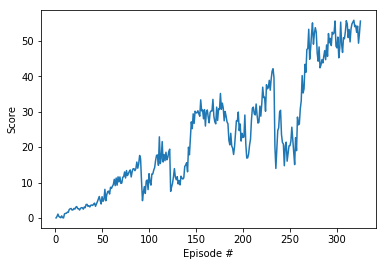

In [10]:
def ddpg(n_episodes=310, max_t=1000):
    episode, scores, scores_deque = load_checkpoint()
    #print(episode, scores)
    agent.reinitialise('checkpoint_agent.pth')
    scores_deque = deque(maxlen=100)
    for i_episode in range(episode, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            score += env_info.rewards  
            
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += rewards
            if np.any(dones):                                  # exit loop if episode finished
                break
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), np.mean(score)), end="")
        if i_episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            agent.saveStates('checkpoint_agent.pth')
            torch.save({'episode': i_episode, 'scores':scores, 'scores_deque': scores_deque}, 'params.pth')
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [11]:
env.close()

The environment was solved in 290 episodes. An average score of over 30 was achieved over the 100 episodes from 190 to 290. 

**Future Ideas**

The following future implementations can be made to further improve the efficiency of the dqn algorithm:

1) The depth of the DDQN actor and critic neural networks could be increased.

2) A more optimal learning rate could be used.